## Lecture 7 in CS50 2016

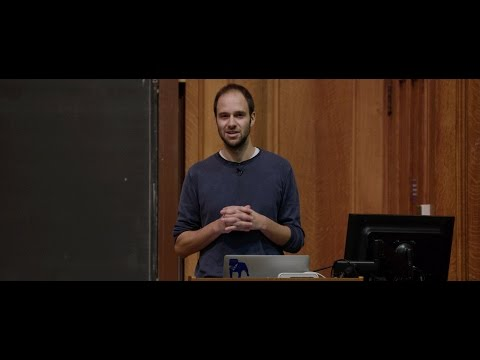

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("dgt6IfEXgDk",width=450, height=200)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
digits = ds.load_digits()

### For this lecture we will be using the SciKit-Learn Data Set of hand-drawn digits

The hand drawn digits will be contained in the drawn_digits variable, and the real digit which drawn_digits[i] is supposed to look like, is located at real_digits[i]

In [7]:
drawn_digits = digits.data
real_digits = digits.target
img = digits.images

Let us try a random number in the test set. 

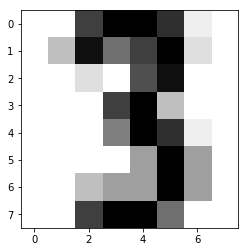

In [8]:
plt.figure('Digit 345')
plt.imshow(img[345], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

This is clearly the number 3.  

### Predicting numbers though machine learning
To predict what digit the hand drawn digits represent, we will compose a short algorithm, utilizing Nearest Neighbour.

This algorithm will be given a test hand-drawn digit, as well as a training set of hand-drawn digits, which is a subset of the drawn digits, not containing the test digit. 

The algorithm compares each digit in our training set, to the given test digit, and looks for the digit which resembles it the most, by comparing the distance between them, in the 64 dimensional vector space. 

After deciding upon which training set digit resembles it the most, the algorithm looks up that digit's real digit in the real_digits table, and this will be the prediction.

We actually do know the test digits real digit, since it already exists in the real_digits table, so we can then check if the algorithm predicted correctly.

If we did not have the actual digit, we could just plot it, and take a look at it with the human eye.

#### Euclidean Distance in 64 dimensions
We will need to compute the Euclidean distance between points in a 64 dimensional space. 

This is done by using Pythagoras, but instead of only doing this for the horizontal and vertical deltas, it has do be done for all 64 deltas. 

We can do this in practice by letting a point be represented by a list of coordinates, and then iterate through these coordinates in Python.

We will of course require both points to be of the same dimension.

In [9]:
def dist(p, q):
    if len(p) != len(q):
        raise Exception('Points need to have the same dimensions') 
    s = 0
    for i in range (len(p)):
        s += abs(p[i] - q[i]) ** 2
    return np.sqrt(s)

#### Nearest Neighbour
The nearest neighbour will take a test point p, as well as a training set where it must compare p to each point in this set, and lastly - a set of labels, or in this case the real digits, so that it can make a literal prediction.

In [14]:
def nearest(p_test, training_points, labels):
    maximum = float("inf")
    label = None
    n = len(training_points)
    for i in range(n):
        d = dist(training_points[i], p_test)
        if d < maximum:
            maximum = d
            label = labels[i]
    return label

In [15]:
print (nearest(drawn_digits[345], drawn_digits[0:10], real_digits))

3


What should the target be?

In [16]:
print(real_digits[345])

3


Good!

Lets try another one...

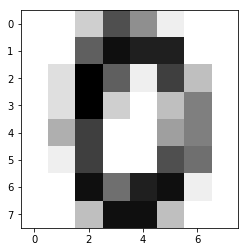

In [17]:
plt.figure('Test digit')
plt.imshow(img[725], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

This looks like the number 0, let's see what the classifier thinks..!

In [18]:
print (nearest(drawn_digits[725], drawn_digits[0:10], real_digits))

0


Looks good - let see what the target should be:

In [19]:
print(real_digits[725])

0


Yep - all good.

## Testing multiple points!

Firstly, we define a function to test whether a single datapoint was classified correctly:

In [20]:
def test_datapoint(p_test, real_value, training_points, REAL_DIGITS):
    prediction = nearest(p_test, training_points, REAL_DIGITS)
    return prediction == real_value

Then, we define a function to test a range of test datapoints, given a range (which should be outside our set of test points, since that would be cheating...)

In [23]:
def compute_error_rate(training_points, DRAWN_DIGITS, REAL_DIGITS, start, end):
    errors = 0
    N = end - start
    for i in range(start, end):
        real_value = REAL_DIGITS[i]
        correct_prediction = test_datapoint(DRAWN_DIGITS[i], real_value, training_points, REAL_DIGITS) 
        if not correct_prediction:
            errors += 1
    return (errors / N)

Let us test it with the range 1697 - 1797, since the lecturer did this. He received an error rate of 37%, or 0.37

Our tests data is still within the range of DATA[0 - 10], so no cheating is involved!

In [24]:
rate_10_points = compute_error_rate(drawn_digits[0:10], drawn_digits, real_digits, 1697, 1797)
print(rate_10_points)

0.37


### It worked!

So 37% missrate isn't too bad, but not too good either...

Let us try expanding the training set to 100 datapoints, instead of 10.

Hopefully this will decrease the error rate!

In [137]:
rate_100_points = compute_error_rate(drawn_digits[0:100], drawn_digits, real_digits, 1697, 1797)
print(rate_100_points)

0.14


Getting there... How about 1000 points?!?

In [25]:
rate_1000_points = compute_error_rate(drawn_digits[0:1000], drawn_digits, real_digits, 1697, 1797)
print(rate_1000_points)

0.03


### Not too shabby..!

## What we test on points within our training data set?

Good question - let us try for simplicity to test 10 (11 actually...) points in DATA[0 - 10], and using the same exact points as the training set:

In [26]:
cheating = compute_error_rate(drawn_digits[0:10], drawn_digits, real_digits, 0, 10)
print(cheating)

0.0


Unsurprisingly we get an error rate of zero percent!

## Is more training data better?

In [27]:
x_rates = [10, 20, 50, 100, 200, 500, 800, 1000]
y_rates = []
for i in range(len(x_rates)):
    x = x_rates[i]
    r = compute_error_rate(drawn_digits[0:x], drawn_digits, real_digits, 1697, 1797)
    y_rates.append(r)
print(y_rates)

[0.37, 0.24, 0.13, 0.14, 0.14, 0.07, 0.02, 0.03]


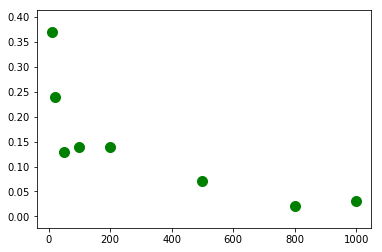

In [28]:
plt.figure('Failure rate as a function of the number of training points')
plt.scatter(x_rates, y_rates, s=100, color='green')
plt.show()

Generally, (and intuitively) - Yes!

However it seems that there are certain breakpoints in our example, where the prediction gets slightly worse, the more test data the algorithm gets fed. 

As an example, the error rate goes from 2% (800 test points) up to 3% (1000 test points)

## In conclusion

We've learned a lot today, haven't we? 

Anyways, here is a picture of a loaf doge:

In [162]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "doge.jpg", width=400, height=400)